In [392]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

In [393]:
train = pd.read_csv("https://raw.githubusercontent.com/rohitgupta29/Hackathron_1/master/hackpredict_homestay/Data/Train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/rohitgupta29/Hackathron_1/master/hackpredict_homestay/Data/Test.csv")

train.shape, test.shape

((34226, 16), (14669, 15))

In [394]:
train.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [395]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['id']
test_ID = test['id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("id", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (34226, 16) 
The test data size before dropping Id feature is : (14669, 15) 

The train data size after dropping Id feature is : (34226, 15) 
The test data size after dropping Id feature is : (14669, 14) 


## Data Preprocessing

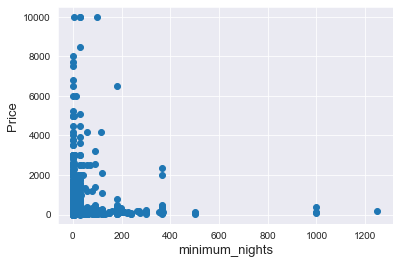

In [396]:
fig, ax = plt.subplots()
ax.scatter(x = train['minimum_nights'], y = train['price'])
plt.ylabel('Price', fontsize = 13)
plt.xlabel('minimum_nights', fontsize = 13)
plt.show()

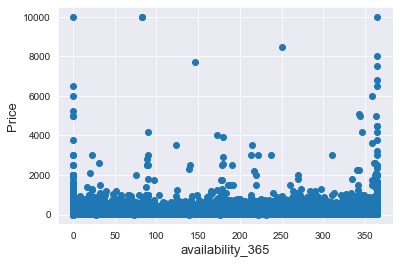

In [397]:
fig, ax = plt.subplots()
ax.scatter(x = train['availability_365'], y = train['price'])
plt.ylabel('Price', fontsize = 13)
plt.xlabel('availability_365', fontsize = 13)
plt.show()

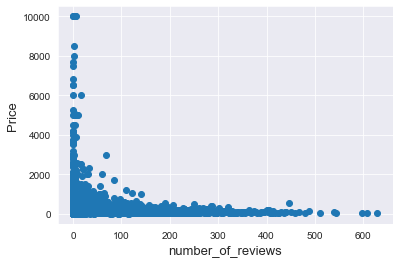

In [398]:
fig, ax = plt.subplots()
ax.scatter(x = train['number_of_reviews'], y = train['price'])
plt.ylabel('Price', fontsize = 13)
plt.xlabel('number_of_reviews', fontsize = 13)
plt.show()

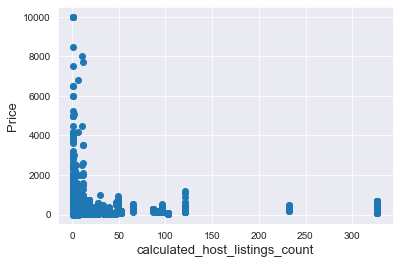

In [399]:
fig, ax = plt.subplots()
ax.scatter(x = train['calculated_host_listings_count'], y = train['price'])
plt.ylabel('Price', fontsize = 13)
plt.xlabel('calculated_host_listings_count', fontsize = 13)
plt.show()

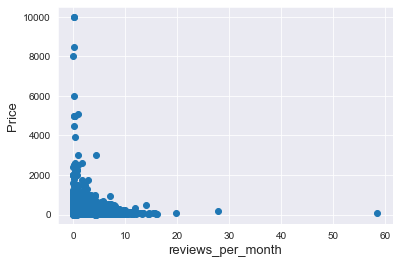

In [400]:
fig, ax = plt.subplots()
ax.scatter(x = train['reviews_per_month'], y = train['price'])
plt.ylabel('Price', fontsize = 13)
plt.xlabel('reviews_per_month', fontsize = 13)
plt.show()

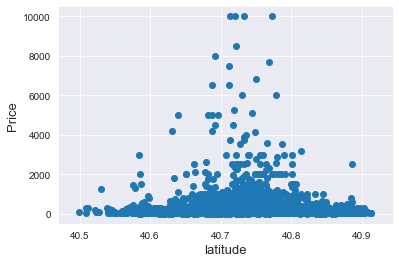

In [401]:
fig, ax = plt.subplots()
ax.scatter(x = train['latitude'], y = train['price'])
plt.ylabel('Price', fontsize = 13)
plt.xlabel('latitude', fontsize = 13)
plt.show()

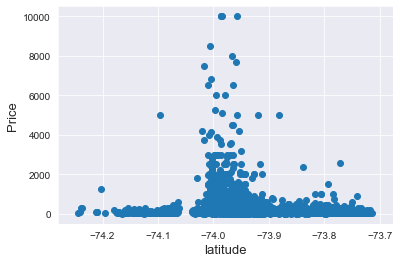

In [402]:
fig, ax = plt.subplots()
ax.scatter(x = train['longitude'], y = train['price'])
plt.ylabel('Price', fontsize = 13)
plt.xlabel('latitude', fontsize = 13)
plt.show()

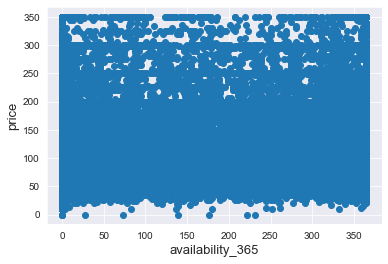

In [403]:
#Deleting outliers
train = train.drop(train[(train['price'] > 350)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['availability_365'], train['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('availability_365', fontsize=13)
plt.show()


## Target Variable


 mu = 122.58 and sigma = 71.87



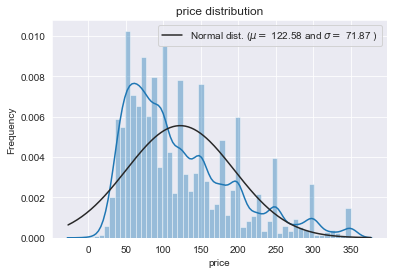

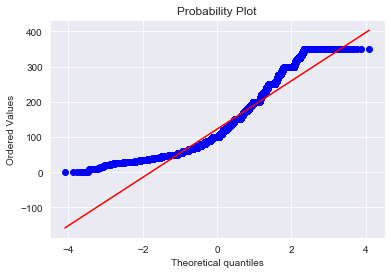

In [404]:
sns.distplot(train['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)
plt.show()

####  The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

#### Log- transformation of the target variable


 mu = 4.65 and sigma = 0.59



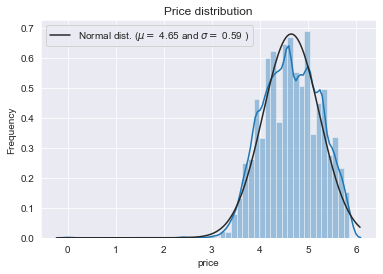

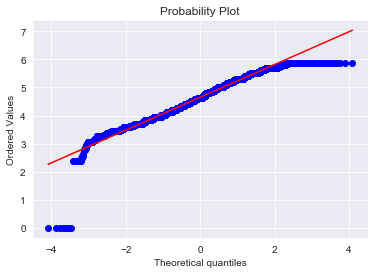

In [405]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["price"] = np.log1p(train["price"])

#Check the new distribution 
sns.distplot(train['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)
plt.show()

#### The skew seems now corrected and the data appears more normally distributed.

### Feature Engineering

### let's first concatenate the train and test data in the same dataframe

In [406]:
ntrain = train.shape[0]
ntest = test.shape[0]
ntrain, ntest

(32480, 14669)

In [407]:
y_train = train.price.values
y_train.shape

(32480,)

In [355]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['price'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (47149, 14)


### Missing Data

In [356]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
reviews_per_month,20.026
last_review,20.026
host_name,0.045
name,0.032


Text(0.5, 1.0, 'Percent missing data by feature')

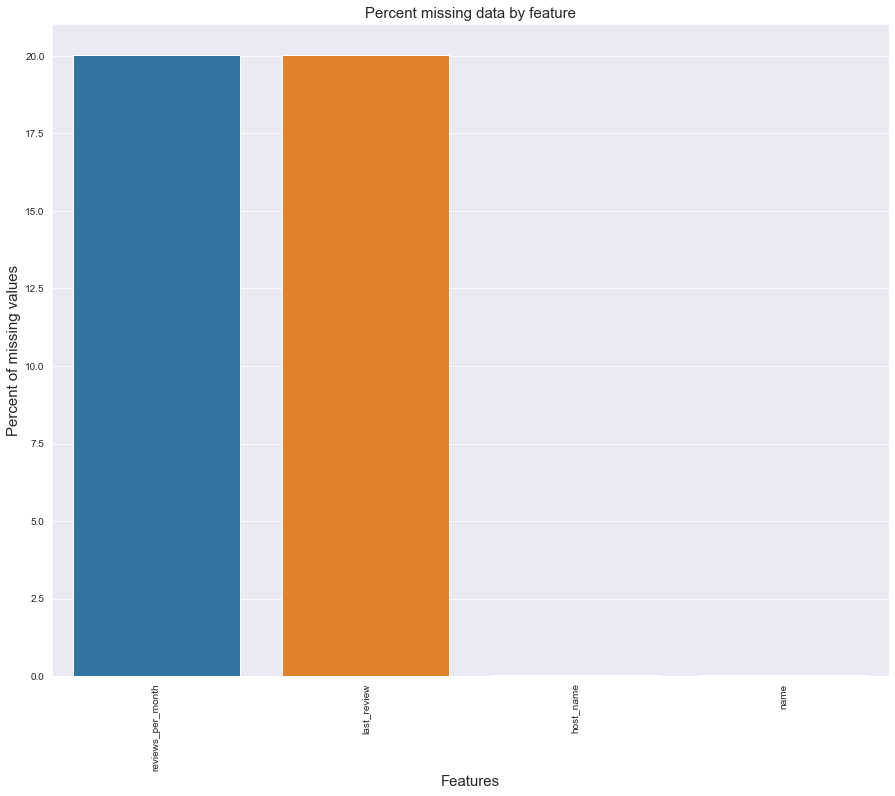

In [357]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Data Correlation

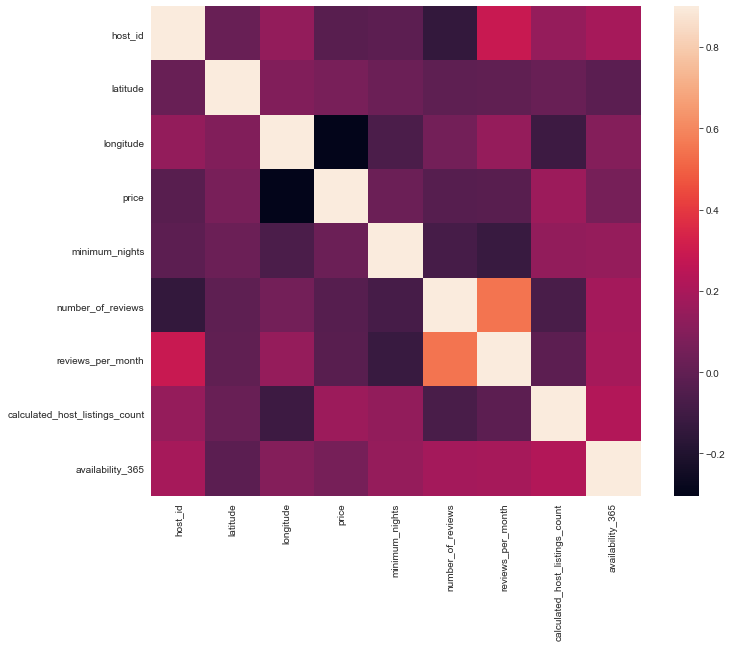

In [358]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

### Imputing the missing Values

In [359]:
all_data

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.722,-73.995,Private room,7,3,2015-09-01,0.060,3,0
1,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.756,-73.893,Entire home/apt,2,4,2019-07-05,4.000,1,365
2,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.601,-74.078,Shared room,2,0,NaN,nan,4,82
3,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.810,-73.943,Shared room,1,16,2019-05-26,0.270,1,365
4,Lower Manhattan Luxury,51105827,Dax,Manhattan,Battery Park City,40.712,-74.016,Entire home/apt,90,1,2016-03-18,0.020,1,362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47144,"Stylish, Artsy & Comfortable Stay Near the Ocean.",32215382,Polina,Brooklyn,Sheepshead Bay,40.594,-73.943,Entire home/apt,2,1,2019-05-20,0.590,1,36
47145,New York Moments (Ladies Only),223248121,Julia,Manhattan,Kips Bay,40.743,-73.981,Shared room,2,1,2019-01-01,0.160,1,365
47146,Enjoy Harlem Renassiance Sunny Room,9501531,Andre,Manhattan,Harlem,40.825,-73.945,Private room,1,93,2019-07-02,1.340,3,358
47147,Glamping Van,10407935,Meng,Manhattan,Nolita,40.722,-73.995,Entire home/apt,1,15,2019-05-27,1.120,8,34


In [360]:
#all_data["reviews_per_month"] = all_data["reviews_per_month"].fillna(0)

In [361]:
all_data['last_review'] = all_data["last_review"].fillna('NA')

In [362]:
all_data['host_name'] = all_data['host_name'].fillna('NA')

In [363]:
all_data['name'] = all_data['name'].fillna('NA')

In [364]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
reviews_per_month,20.026


In [365]:
##### There remain no missing value

#### More Feature Engineering

#### Transforming some numerical variables that are really categorical

#### Label Encoding some categorical variables that may contain information in their ordering set

In [366]:
from sklearn.preprocessing import LabelEncoder
cols = ('neighbourhood','neighbourhood_group','host_id','room_type')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (47149, 14)


In [367]:
all_data["host_id"].nunique, all_data["host_name"].nunique

(<bound method IndexOpsMixin.nunique of 0         6606
 1        35887
 2        21978
 3        13984
 4        23678
          ...  
 47144    19481
 47145    33851
 47146    10743
 47147    11367
 47148     1388
 Name: host_id, Length: 47149, dtype: int64>,
 <bound method IndexOpsMixin.nunique of 0           Nat
 1         Jenny
 2          Rita
 3          Gina
 4           Dax
           ...  
 47144    Polina
 47145     Julia
 47146     Andre
 47147      Meng
 47148     Deren
 Name: host_name, Length: 47149, dtype: object>)

In [368]:
all_data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Large private room in Nolita,6606,Nat,2,145,40.722,-73.995,1,7,3,2015-09-01,0.060,3,0
1,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,35887,Jenny,3,59,40.756,-73.893,0,2,4,2019-07-05,4.000,1,365
2,Stream-Pressed Paradise (Laundry Room Setup),21978,Rita,4,46,40.601,-74.078,2,2,0,NA,nan,4,82
3,Charming Harlem apartment,13984,Gina,2,94,40.810,-73.943,2,1,16,2019-05-26,0.270,1,365
4,Lower Manhattan Luxury,23678,Dax,2,6,40.712,-74.016,0,90,1,2016-03-18,0.020,1,362


In [369]:
### Transforming some numerical variables that are really categorical

In [370]:
#MSSubClass=The building class
all_data['room_type'] = all_data['room_type'].apply(str)


#Changing OverallCond into a categorical variable
all_data['longitude'] = all_data['longitude'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['latitude'] = all_data['latitude'].astype(str)

all_data['neighbourhood'] = all_data['neighbourhood'].astype(str)

all_data['neighbourhood_group'] = all_data['neighbourhood_group'].astype(str)

all_data['host_id'] = all_data['host_id'].astype(str)

In [371]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
minimum_nights,21.575
calculated_host_listings_count,8.186
number_of_reviews,3.653
reviews_per_month,3.146
availability_365,0.792


### Box Cox Transformation of (highly) skewed features

#### We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .

- Note that setting  λ=0  is equivalent to log1p used above for the target variable.

In [372]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 5 skewed numerical features to Box Cox transform


In [373]:
all_data = all_data.drop(['latitude','longitude','last_review','reviews_per_month','name','minimum_nights','availability_365','calculated_host_listings_count','host_name','host_id'], axis = 'columns')
all_data

,neighbourhood_group,neighbourhood,room_type,number_of_reviews
0,2,145,1,1.541
1,3,59,0,1.820
2,4,46,2,0.000
3,2,94,2,3.530
4,2,6,0,0.730
...,...,...,...,...
47144,1,175,0,0.730
47145,2,112,2,0.730
47146,2,94,1,6.512
47147,2,145,0,3.438


In [374]:
# all_data_1 = pd.get_dummies(all_data)
# print(all_data_1.shape)

In [387]:
train = all_data[:ntrain]
test = all_data[ntrain:]
train.shape, test.shape, y_train.shape

((34073, 4), (13076, 4), (32480,))

# Modelling

### Import Libraries

In [376]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

### Define a cross validation strategy

#### We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation

In [377]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Base Models

####  LASSO Regression
  - This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [378]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

#### Elastic Net Regression :
- again made robust to outliers

In [379]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

#### Kernel Ridge Regression :

In [380]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#### Gradient Boosting Regression :
- With huber loss that makes it robust to outliers

In [381]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

#### XGBoost :

In [382]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

#### LightGBM :

In [383]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#### Base models scores

- Let's see how these base models perform on the data by evaluating the cross-validation rmsle error

In [384]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ValueError: Found input variables with inconsistent numbers of samples: [34073, 32480]

In [337]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0916 (0.0033)



In [338]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

KeyboardInterrupt: 

In [255]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: nan (nan)



In [ ]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

## Stacking models

- Simplest Stacking approach : Averaging base models
    
- We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse (inheritance)

#### Averaged Base Models Class

In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

#### Averaged base models score

- We just average four models here ENet, GBoost, KRR and lasso. Of course we could easily add more models in the mix.

In [ ]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

### Stacking over Models Class

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

#### Stacking Averaged models Score

- To make the two approaches comparable (by using the same number of models) , we just average Enet KRR and Gboost, then we add lasso as meta-model.

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

## Ensembling StackedRegressor, XGBoost and LightGBM

- We add XGBoost and LightGBM to the StackedRegressor defined previously.

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

### StackedRegressor

In [ ]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

## XGBoost

In [408]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields name, host_name, neighbourhood_group, neighbourhood, room_type, last_review

## LightGBM:

In [ ]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

In [ ]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

## Ensemble Prediction

In [ ]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15
ensemble

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)